In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, kruskal
import networkx as nx
import matplotlib.pyplot as plt
import utils_PLS as upls
import scikit_posthocs as sp

In [2]:
def boxplot(dfs, value):
    df = pd.concat(dfs, ignore_index=True)
    f, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), sharey=True)
    sns.boxplot(
        data=df,
        x="group", y=value, palette="Accent", ax=ax)
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelrotation=90)

# c57 with father

n_cells
KruskalResult(statistic=0.9200108533442091, pvalue=0.6312802197468721)
energy
KruskalResult(statistic=0.9140415140415286, pvalue=0.6331671972616968)
density
KruskalResult(statistic=3.061809795143134, pvalue=0.21633981334375155)
relative_density
KruskalResult(statistic=4.084981684981699, pvalue=0.12970523287396482)


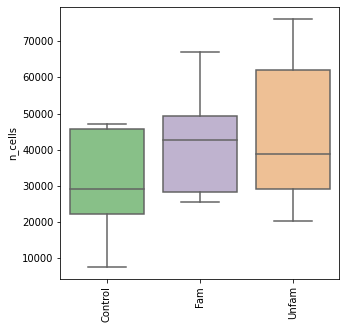

In [13]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy', 
                                   allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')
for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# c57 without father

n_cells
KruskalResult(statistic=3.036945812807872, pvalue=0.21904613562370936)
energy
KruskalResult(statistic=3.062438423645318, pvalue=0.21627182534269748)
density
KruskalResult(statistic=2.881773399014776, pvalue=0.23671776806825728)
relative_density
KruskalResult(statistic=2.3231527093596043, pvalue=0.31299240475971707)


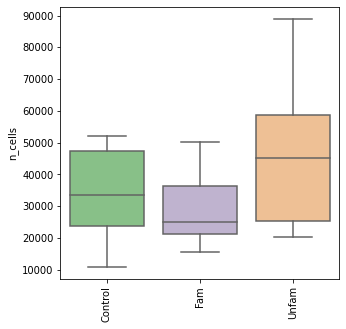

In [14]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000_36.npy', 
                                   allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')
for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# WILD with father

n_cells
KruskalResult(statistic=0.8800219780219862, pvalue=0.6440293437987165)
energy
KruskalResult(statistic=0.2967032967032992, pvalue=0.8621278957784488)
density
KruskalResult(statistic=0.41558241758242787, pvalue=0.8123766361057339)
relative_density
KruskalResult(statistic=0.5856923076923266, pvalue=0.746136922163362)


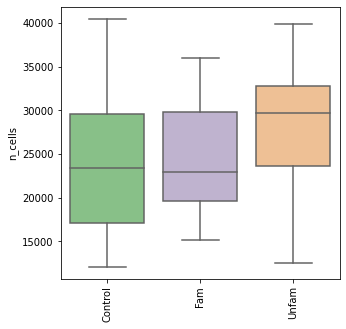

In [15]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy', 
                                   allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')
for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# WILD_without_father

n_cells
KruskalResult(statistic=4.481987577639757, pvalue=0.10635275966048233)
energy
KruskalResult(statistic=2.6269151138716467, pvalue=0.2688887491290317)
density
KruskalResult(statistic=2.163975155279502, pvalue=0.3389212235075171)
relative_density
KruskalResult(statistic=3.8059006211180133, pvalue=0.14912799565384136)


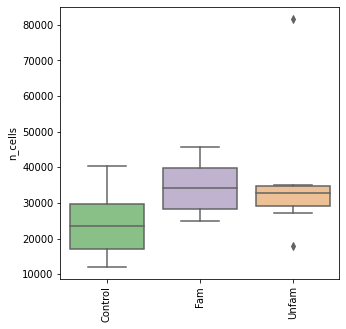

In [16]:
dict_results_across_mice = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy', 
                                   allow_pickle=True).item()
subjects = list(dict_results_across_mice.keys())
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
boxplot(ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
        experimental_groups=experimental_groups, 
        value='n_cells'), value='n_cells')
for value in ['n_cells', 'energy', 'density', 'relative_density']:
    print(value)
    df = ace.create_dfs_across_groups(dictionary_results=dict_results_across_mice, 
            experimental_groups=experimental_groups, 
            value=value)
    print(kruskal(*[df[key][value].to_numpy() for key in df.keys()]))

# Make kruskal test per area

In [17]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_c57_merged_hemispheres_F6BL48.npy',
                                    allow_pickle=True).item()
c57_wf = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells')

In [18]:
c57_wf

{'Infralimbic area': (KruskalResult(statistic=6.242515417019528, pvalue=0.0441016664831495),
            Control       Fam     Unfam
  Control  1.000000  0.050894  0.050894
  Fam      0.050894  1.000000  0.803950
  Unfam    0.050894  0.803950  1.000000),
 'Main olfactory bulb': (KruskalResult(statistic=7.539682539682545, pvalue=0.023055722635306922),
           Control      Fam    Unfam
  Control  1.00000  0.02399  0.02399
  Fam      0.02399  1.00000  1.00000
  Unfam    0.02399  1.00000  1.00000),
 'Accessory olfactory bulb': (KruskalResult(statistic=7.861294261294262, pvalue=0.019630964642816575),
           Control       Fam     Unfam
  Control  1.00000  0.021660  0.021660
  Fam      0.02166  1.000000  0.977299
  Unfam    0.02166  0.977299  1.000000),
 'Cortical amygdalar area': (KruskalResult(statistic=12.69744234903264, pvalue=0.001748982349931995),
            Control       Fam     Unfam
  Control  1.000000  0.003027  0.003027
  Fam      0.003027  1.000000  0.816207
  Unfam    0.0

In [12]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_BL_woF2000_36.npy',
                                    allow_pickle=True).item()
c57_wof = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells')
c57_wof

{'Main olfactory bulb': (KruskalResult(statistic=10.69802955665024, pvalue=0.004752831285872949),
            Control       Fam     Unfam
  Control  1.000000  0.026637  0.004257
  Fam      0.026637  1.000000  0.384379
  Unfam    0.004257  0.384379  1.000000),
 'Accessory olfactory bulb': (KruskalResult(statistic=14.759895262869664, pvalue=0.000623633543938199),
            Control       Fam     Unfam
  Control  1.000000  0.005950  0.000612
  Fam      0.005950  1.000000  0.376864
  Unfam    0.000612  0.376864  1.000000),
 'Anterior olfactory nucleus': (KruskalResult(statistic=6.879310344827587, pvalue=0.03207574402246676),
            Control       Fam     Unfam
  Control  1.000000  0.243577  0.027863
  Fam      0.243577  1.000000  0.191920
  Unfam    0.027863  0.191920  1.000000),
 'Cortical amygdalar area': (KruskalResult(statistic=14.731403940886707, pvalue=0.0006325811972878339),
            Control       Fam     Unfam
  Control  1.000000  0.044783  0.000372
  Fam      0.044783  1.0

In [6]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_with_father2500_newwild.npy',
                                    allow_pickle=True).item()
wild_wf = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells')
wild_wf

{'Cortical amygdalar area': (KruskalResult(statistic=10.257928873742648, pvalue=0.005922690619085436),
            Control       Fam     Unfam
  Control  1.000000  0.049652  0.006361
  Fam      0.049652  1.000000  0.330572
  Unfam    0.006361  0.330572  1.000000),
 'Postpiriform transition area': (KruskalResult(statistic=7.8060046189376555, pvalue=0.020181230101072523),
            Control       Fam     Unfam
  Control  1.000000  0.641463  0.021484
  Fam      0.641463  1.000000  0.049277
  Unfam    0.021484  0.049277  1.000000),
 "Ammon's horn": (KruskalResult(statistic=6.307714285714297, pvalue=0.04268715844988441),
            Control       Fam     Unfam
  Control  1.000000  0.057589  0.856224
  Fam      0.057589  1.000000  0.072627
  Unfam    0.856224  0.072627  1.000000),
 'Posterior amygdalar nucleus': (KruskalResult(statistic=13.680475456746649, pvalue=0.0010698490359350515),
            Control       Fam     Unfam
  Control  1.000000  0.005681  0.002710
  Fam      0.005681  1.00

In [7]:
results = np.load('dict_results/newvolumes/dict_results_across_mice_WILD_without_father2500.npy',
                                    allow_pickle=True).item()
wild_wof = ace.kruskal_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells')
wild_wof

{'Primary motor area': (KruskalResult(statistic=10.507660455486544, pvalue=0.005227457651766495),
            Control       Fam     Unfam
  Control  1.000000  0.022249  0.010383
  Fam      0.022249  1.000000  0.742824
  Unfam    0.010383  0.742824  1.000000),
 'Secondary motor area': (KruskalResult(statistic=6.9760869565217405, pvalue=0.030560606207097732),
            Control       Fam     Unfam
  Control  1.000000  0.233035  0.025401
  Fam      0.233035  1.000000  0.233035
  Unfam    0.025401  0.233035  1.000000),
 'Agranular insular area': (KruskalResult(statistic=10.841511387163564, pvalue=0.004423802345317263),
            Control       Fam     Unfam
  Control  1.000000  0.159393  0.003181
  Fam      0.159393  1.000000  0.159393
  Unfam    0.003181  0.159393  1.000000),
 'Main olfactory bulb': (KruskalResult(statistic=9.827225672877844, pvalue=0.007345900794010483),
            Control       Fam     Unfam
  Control  1.000000  0.010440  0.042501
  Fam      0.010440  1.000000  0.441

In [13]:
c57_wf.keys()

dict_keys(['Infralimbic area', 'Main olfactory bulb', 'Accessory olfactory bulb', 'Cortical amygdalar area', 'Piriform-amygdalar area', 'Basomedial amygdalar nucleus', 'Posterior amygdalar nucleus', 'Intercalated amygdalar nucleus', 'Medial amygdalar nucleus', 'Bed nuclei of the stria terminalis', 'Arcuate hypothalamic nucleus', 'Posterodorsal preoptic nucleus', 'Periventricular hypothalamic nucleus posterior part', 'Medial preoptic nucleus', 'Dorsal premammillary nucleus', 'Ventral premammillary nucleus', 'Tuberal nucleus'])

In [ ]:
# 

In [27]:
def kruskal_all_per_area(dictionary, value, experimental_groups):
    """
    Performs a Kruskal-Wallis H-test on a given dictionary of dataframes for each area.

    Parameters:
    dictionary (dict): A dictionary where keys are subjects and values are pandas dataframes.
    value (str): The column name in the dataframe to perform the test on.
    experimental_groups (list): A list of experimental groups.

    Returns:
    dict: A dictionary where keys are areas and values are tuples. 
    Each tuple contains the result of the Kruskal-Wallis H-test and the result of the post-hoc Dunn's test.
    
    """
    
    # Get the list of subjects from the dictionary keys
    subjects = list(dictionary.keys())

    # Create a dataframe of levels from the cleaned volumes database
    df_levels = upls.create_df_levels(ace.clean_volumes_database())

    # Filter out certain areas and convert the remaining areas to a numpy array
    areas = df_levels[~df_levels['parent_l5'].isin(['P','MY','CBX', 'CBN'])]['name_area'].to_numpy()

    # Initialize an empty dictionary to store significant areas
    significant_areas = {}

    # Loop over each area
    for area in areas:
        # Create dataframes for the results dictionary, experimental groups, value, and area
        dfs = ace.create_dfs_across_groups(dictionary_results=dictionary, 
                experimental_groups=experimental_groups, 
                value=value, area=area)

        # Calculate the total sum of the value column for each key in the dataframes
        tot_sum = 0
        for key in dfs.keys():
            tot_sum += dfs[key][value].to_numpy().sum()

        # If the total sum is not zero, perform a Kruskal-Wallis H-test
        if tot_sum != 0:
            # If the p-value of the test is less than 0.05, add the area to the significant_areas dictionary
            significant_areas[area] = \
                (kruskal(*[dfs[key][value].to_numpy() for key in dfs.keys()]), 
                 sp.posthoc_dunn(pd.concat(dfs, ignore_index=True), val_col=value, 
            group_col='group', p_adjust = 'fdr_bh'))

    return significant_areas
    

In [28]:
c57_wof_all = kruskal_all_per_area(dictionary=results,
                 experimental_groups=utils.divide_in_exp_groups(list_subjects=list(results.keys())),
                 value='n_cells')

In [29]:
c57_wof_all['Piriform area']

(KruskalResult(statistic=2.2307692307692406, pvalue=0.32778918188945116),
           Control       Fam     Unfam
 Control  1.000000  0.424568  0.432883
 Fam      0.424568  1.000000  0.635315
 Unfam    0.432883  0.635315  1.000000)